## Data understanding 

In [627]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor




In [628]:
# To display the rows and columns in detail

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [629]:
# Reading the dataset into df variable

df = pd.read_csv('day.csv')

In [630]:
# Checking the structure,dtype and some more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [631]:
# Checking the first 5 values of the dataset

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [632]:
# Checking the shape of dataset

df.shape

(730, 16)

In [633]:
# Checking the statistical summary of the numerical columns of dataset

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data preparation

Values of multiple columns are converted from integer to string to help in understanding the data better and to be able to draw better insights.

In [634]:
# Replacing the integer value of season with string values as mentioned in the data dictionary as the integer values may
# mislead regarding the order of seasons

df['season'].replace(to_replace=[1,2,3,4],value=['spring','summer','fall','winter'],inplace=True)

In [635]:
# Checking the first 5 values of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [636]:
# Mapping the integer values of mnth to string value  month names

df['mnth'] = df['mnth'].map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'July',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

In [637]:
# Assuming that the week starts with Sunday and hence mapping 0 to Sun,1 to Mon and so on 

df['weekday'] = df['weekday'].map({
    0:'Sun',
    1:'Mon',
    2:'Tue',
    3:'Wed',
    4:'Thu',
    5:'Fri',
    6:'Sat',
})

In [638]:
# Mapping the integer values of weathersit to string value weather

df['weathersit'] = df['weathersit'].map({
    1:'Clear',
    2:'Mist',
    3:'Light Snow',
    4:'Heavy Rain'
})

In [639]:
# Converting 1s and 0s of holiday column to 'Yes' and 'No'

df['holiday'] = df['holiday'].apply(lambda x:'No' if x==0 else 'Yes')

In [640]:
# Converting 1s and 0s of workingday column to 'Not_Hol' and 'Hol'

df['workingday'] = df['workingday'].apply(lambda x:'Hol' if x==0 else 'Not_Hol')

In [641]:
# Converting 1s and 0s of yr column to '2019' and '2018'

df['yr'] = df['yr'].apply(lambda x:'2018' if x==0 else '2019')

In [642]:
# Dropping dteday,instant as they don't add any value to our analysis

df.drop(['instant','dteday'],axis=1,inplace=True)

## Data visualization

Through Data visualization we can understand how different variables are related to each other as well as the target variable. Also, we can understand the distribution of numeric variables

In [643]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No,Mon,Not_Hol,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Tue,Not_Hol,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No,Wed,Not_Hol,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No,Thu,Not_Hol,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No,Fri,Not_Hol,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [644]:
# Categorizing the columns into numerical and categorical variables

num_vars = []
cat_vars = []
for i in df.columns:
    if df[i].nunique()>30:
        num_vars.append(i)
    else:
        cat_vars.append(i)

In [645]:
# Checking the content of numerical variables
print(num_vars)

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [646]:
# Checking the content of categorical variables
print(cat_vars)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


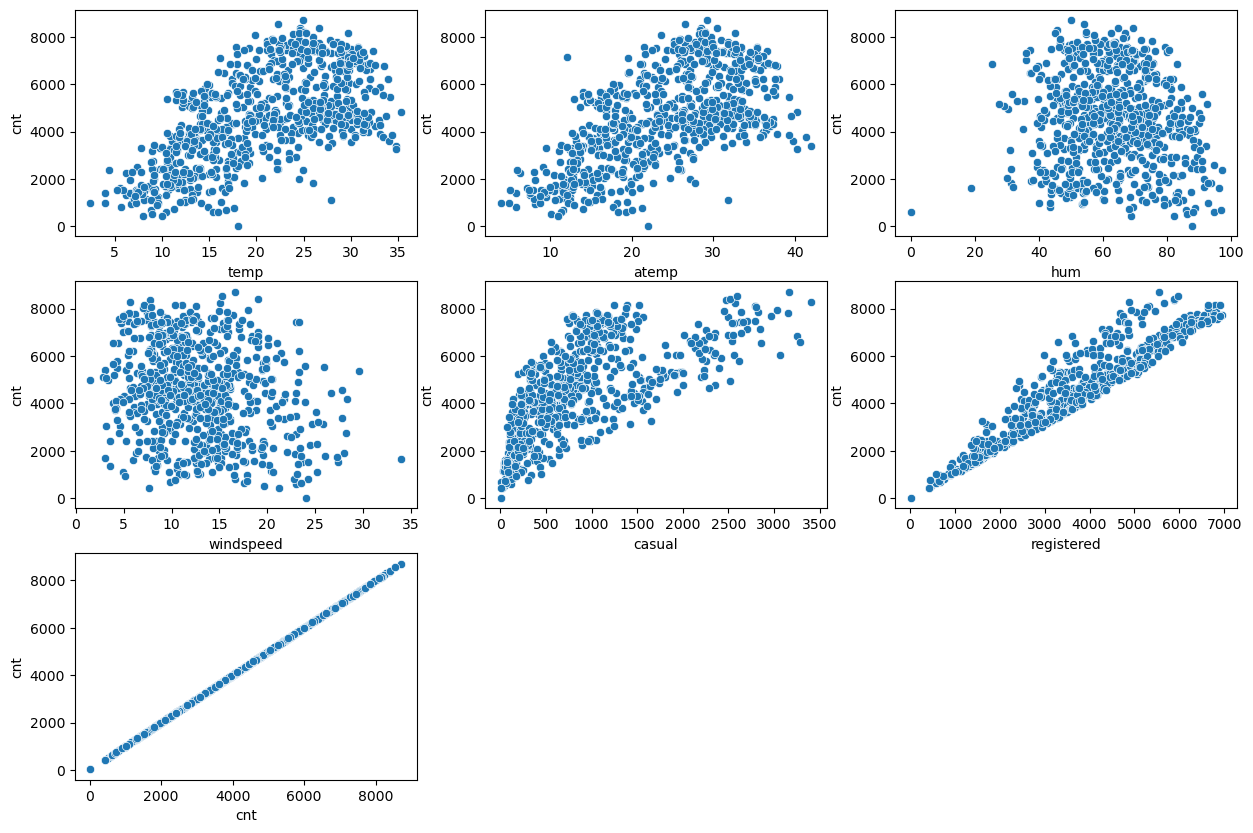

In [647]:
# Scatter plot of cnt(target variable) with different numeric variables helps us understand the relationship between them

plt.figure(figsize=[15,10])
x=1
for i in num_vars:
    plt.subplot(3,3,x)
    sns.scatterplot(y='cnt',x=i,data = df)
    x+=1
plt.show()

#### Insights from the above graphs

1. There is a positive linear relationship between cnt v/s temp and cnt v/s atemp variable

2. Although there seems to be a strong relationship between cnt v/s registered and cnt v/s casual variables it doesn't give important insights as casual and registered are added to obtain cnt and hence they are bound to be strongly related to cnt

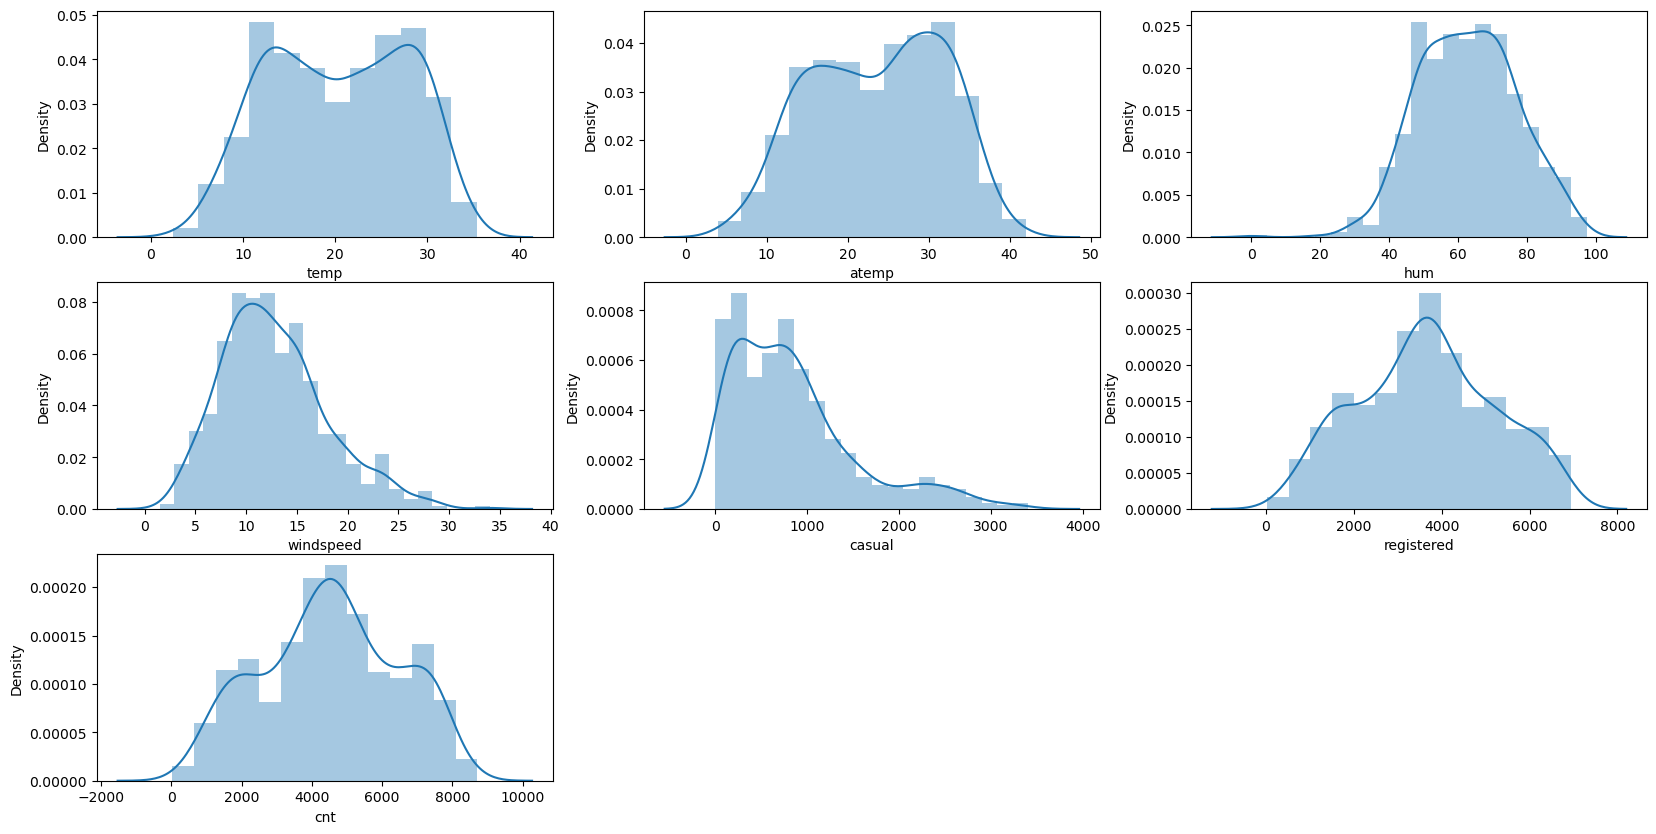

In [648]:
# Distplots show us the distribution of numeric variables

plt.figure(figsize=[20,10])
x=1
for i in num_vars:
    plt.subplot(3,3,x)
    sns.distplot(df[i])
    x+=1
plt.show()

#### Insights from the above graphs

1. The variables windspeed,hum are  more close to normal distribution compared to temp,atemp.
2. Variable casual seems to be skewed a bit to left side




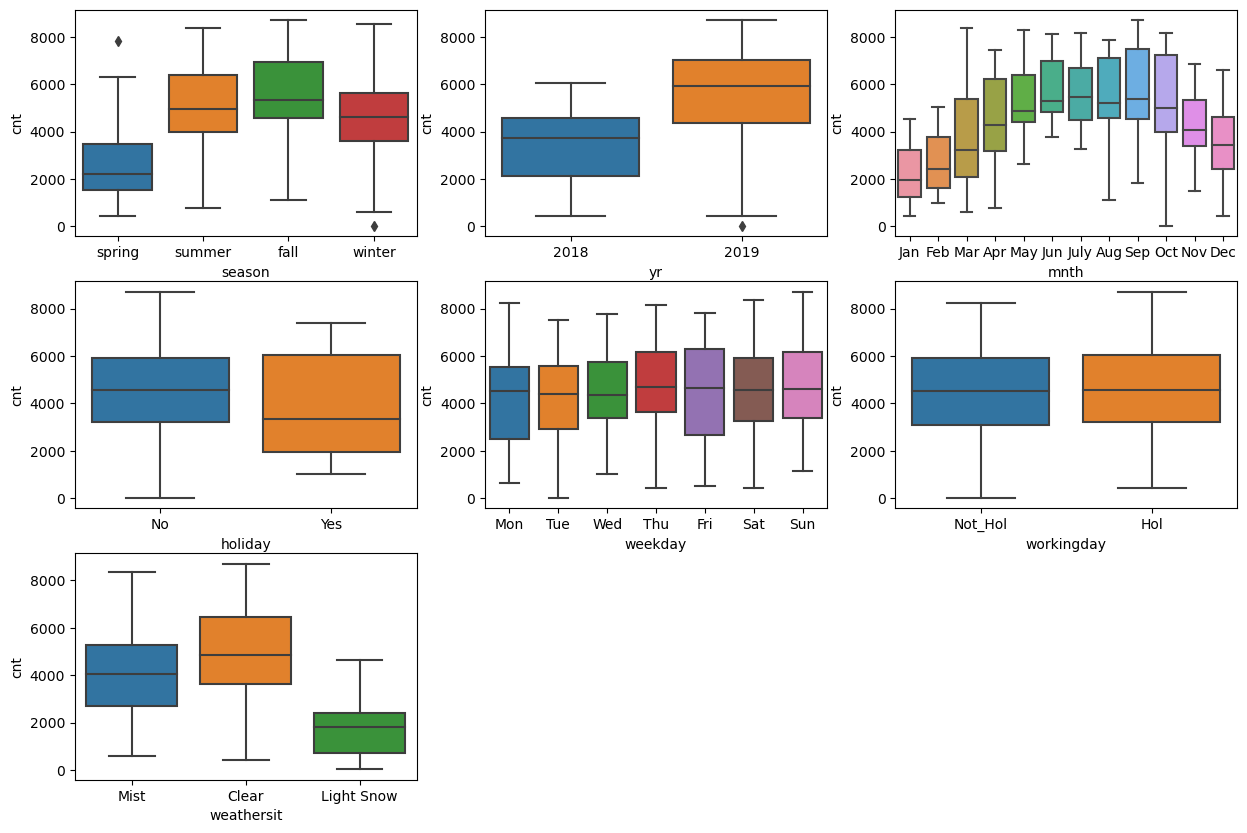

In [649]:
# Boxplots help us in understanding how cnt variable is varying for different categorical variables.

plt.figure(figsize=[15,10])
x=1
for i in cat_vars:
    plt.subplot(3,3,x)
    sns.boxplot(y='cnt',x=i,data = df)
    x+=1
plt.show()

#### Insights for above graphs


1. We could see that the workingday variable did not have much effect on the target variable ‘cnt’. 

2. When the weathersit was 'Clear' the cnt of users was considerably higher compared to Light snow weather conditions.

3. The median of cnt of users on a holiday is just about 2700 while on other days the cnt of users was as high as around 4200

4. The median of cnt of users was similar for all the days of week , but the range of cnt of users was highest for Thursday

5. Year 2019 saw a higher number of users compared to 2018 and particularly in the month of September while the lowest number was in January

6. Fall saw a pretty good number of users compared to other seasons.

 

<Axes: >

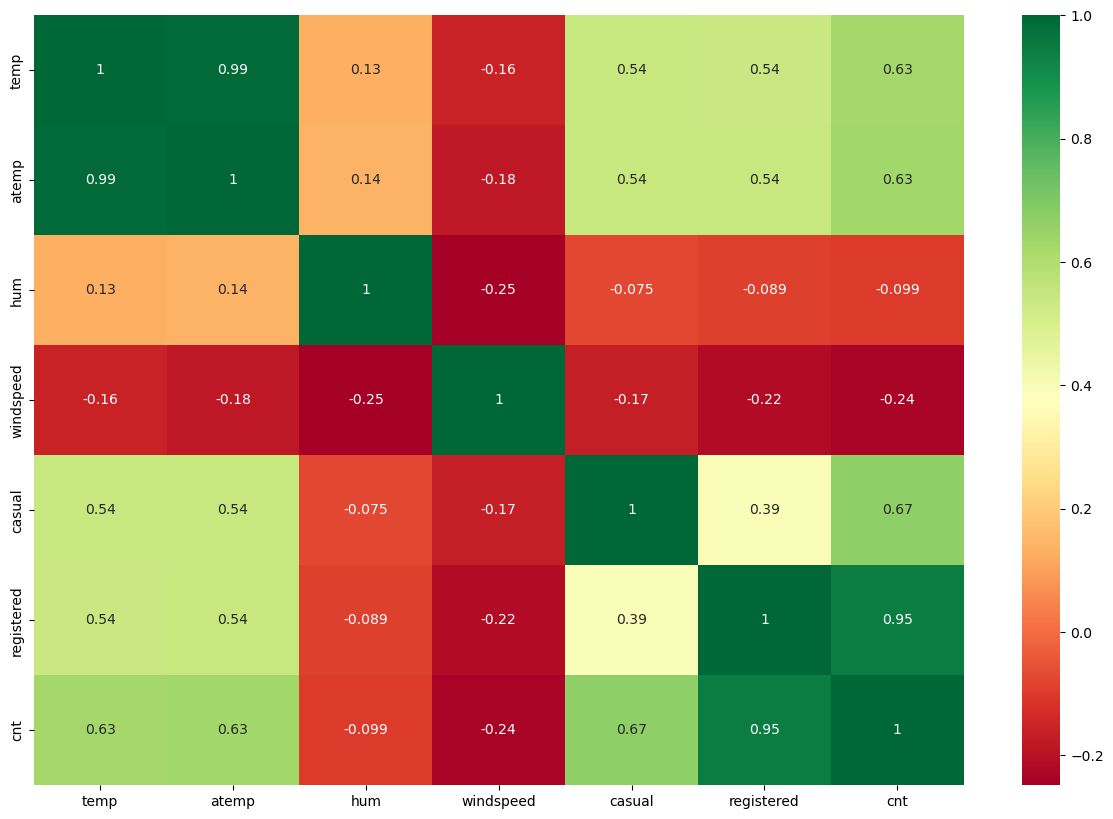

In [650]:
# check co-relation to know how different variables are related to each other

plt.figure(figsize=[15,10])
sns.heatmap(df[num_vars].corr(),annot=True,cmap='RdYlGn')

#### Insights from heatmap

1. temp and atemp are highly correlated to each other. This is pretty obvious as the real time temperature and the ambient temperature(temperature felt) would not be very much different

2. cnt variable is highly correlated with casual and registered.High correlation of cnt with casual and registered is because casual and registered add upto cnt and hence they are higly correlated

3. cnt variable is highly correlated with temp and atemp as well.

In [651]:
# Dropping atemp as it's highly corelated with temp

df.drop('atemp',axis=1,inplace=True)

In [652]:
# dum_cols = ['season','mnth','weekday','weathersit']

## Creation of dummy variables

In [653]:
cat_vars

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [654]:
# Creation of dummy variables and assigning it to dummy dataset df_dummies

df_dummies = pd.get_dummies(df[cat_vars],dtype=int,drop_first=True)

In [655]:
df_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not_Hol,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [656]:
# Dropping the columns whose dummy variables were created as the original columns would become redundant

df.drop(['season','mnth','weekday','weathersit','yr','holiday','workingday'],axis=1,inplace=True)

In [657]:
# Concatenating the dummy dataset to original dataframe df

df = pd.concat([df,df_dummies],axis=1)

In [658]:
# # Checking the top 5 values of dataset 
df.head()

,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not_Hol,weathersit_Light Snow,weathersit_Mist
0,14.110847,80.5833,10.749882,331,654,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,131,670,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [659]:
# Checking the shape of original dataset after concatenation

df.shape

(730, 31)

In [660]:
# Dropping the variable casual and registered as they are being represented by cnt variable

df.drop(['casual','registered'],inplace=True,axis=1)

In [661]:
# Checking the shape of  dataset after dropping the variables casual and registered

df.shape

(730, 29)

## Scaling

We see that values in numerical columns are at different scales compared to each other. If untreated then the value of coefficients may swing extremely giving wrong insights.

There are 2 methods to scale the values : MinMaxScaler and Standardizing method

Here we scale the numerical columns using MinMaxScaler method to bring them to a uniform scale between 0 and 1.

In [662]:
# Splitting the dataset into training and test dataset

df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)

In [663]:
# Importing necessary library for scaling

from sklearn.preprocessing import MinMaxScaler

In [664]:
# Creating an object of MinMaxScaler

scaler = MinMaxScaler()

In [665]:
# Creating a variable of variables to be scaled

scale_vars = ['temp','hum','windspeed','cnt'] 

In [666]:
# Learning the data patterns by fitting and transforming on the training dataset

df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])

In [667]:
df_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not_Hol,weathersit_Light Snow,weathersit_Mist
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [668]:
# y_train will be the target variable and other columns will be the predictor variables

y_train = df_train.pop('cnt')
X_train = df_train

In [669]:
# Checking shape of X_train

X_train.shape

(510, 28)

In [670]:
X_train.describe().columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_July', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'workingday_Not_Hol', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

<Axes: >

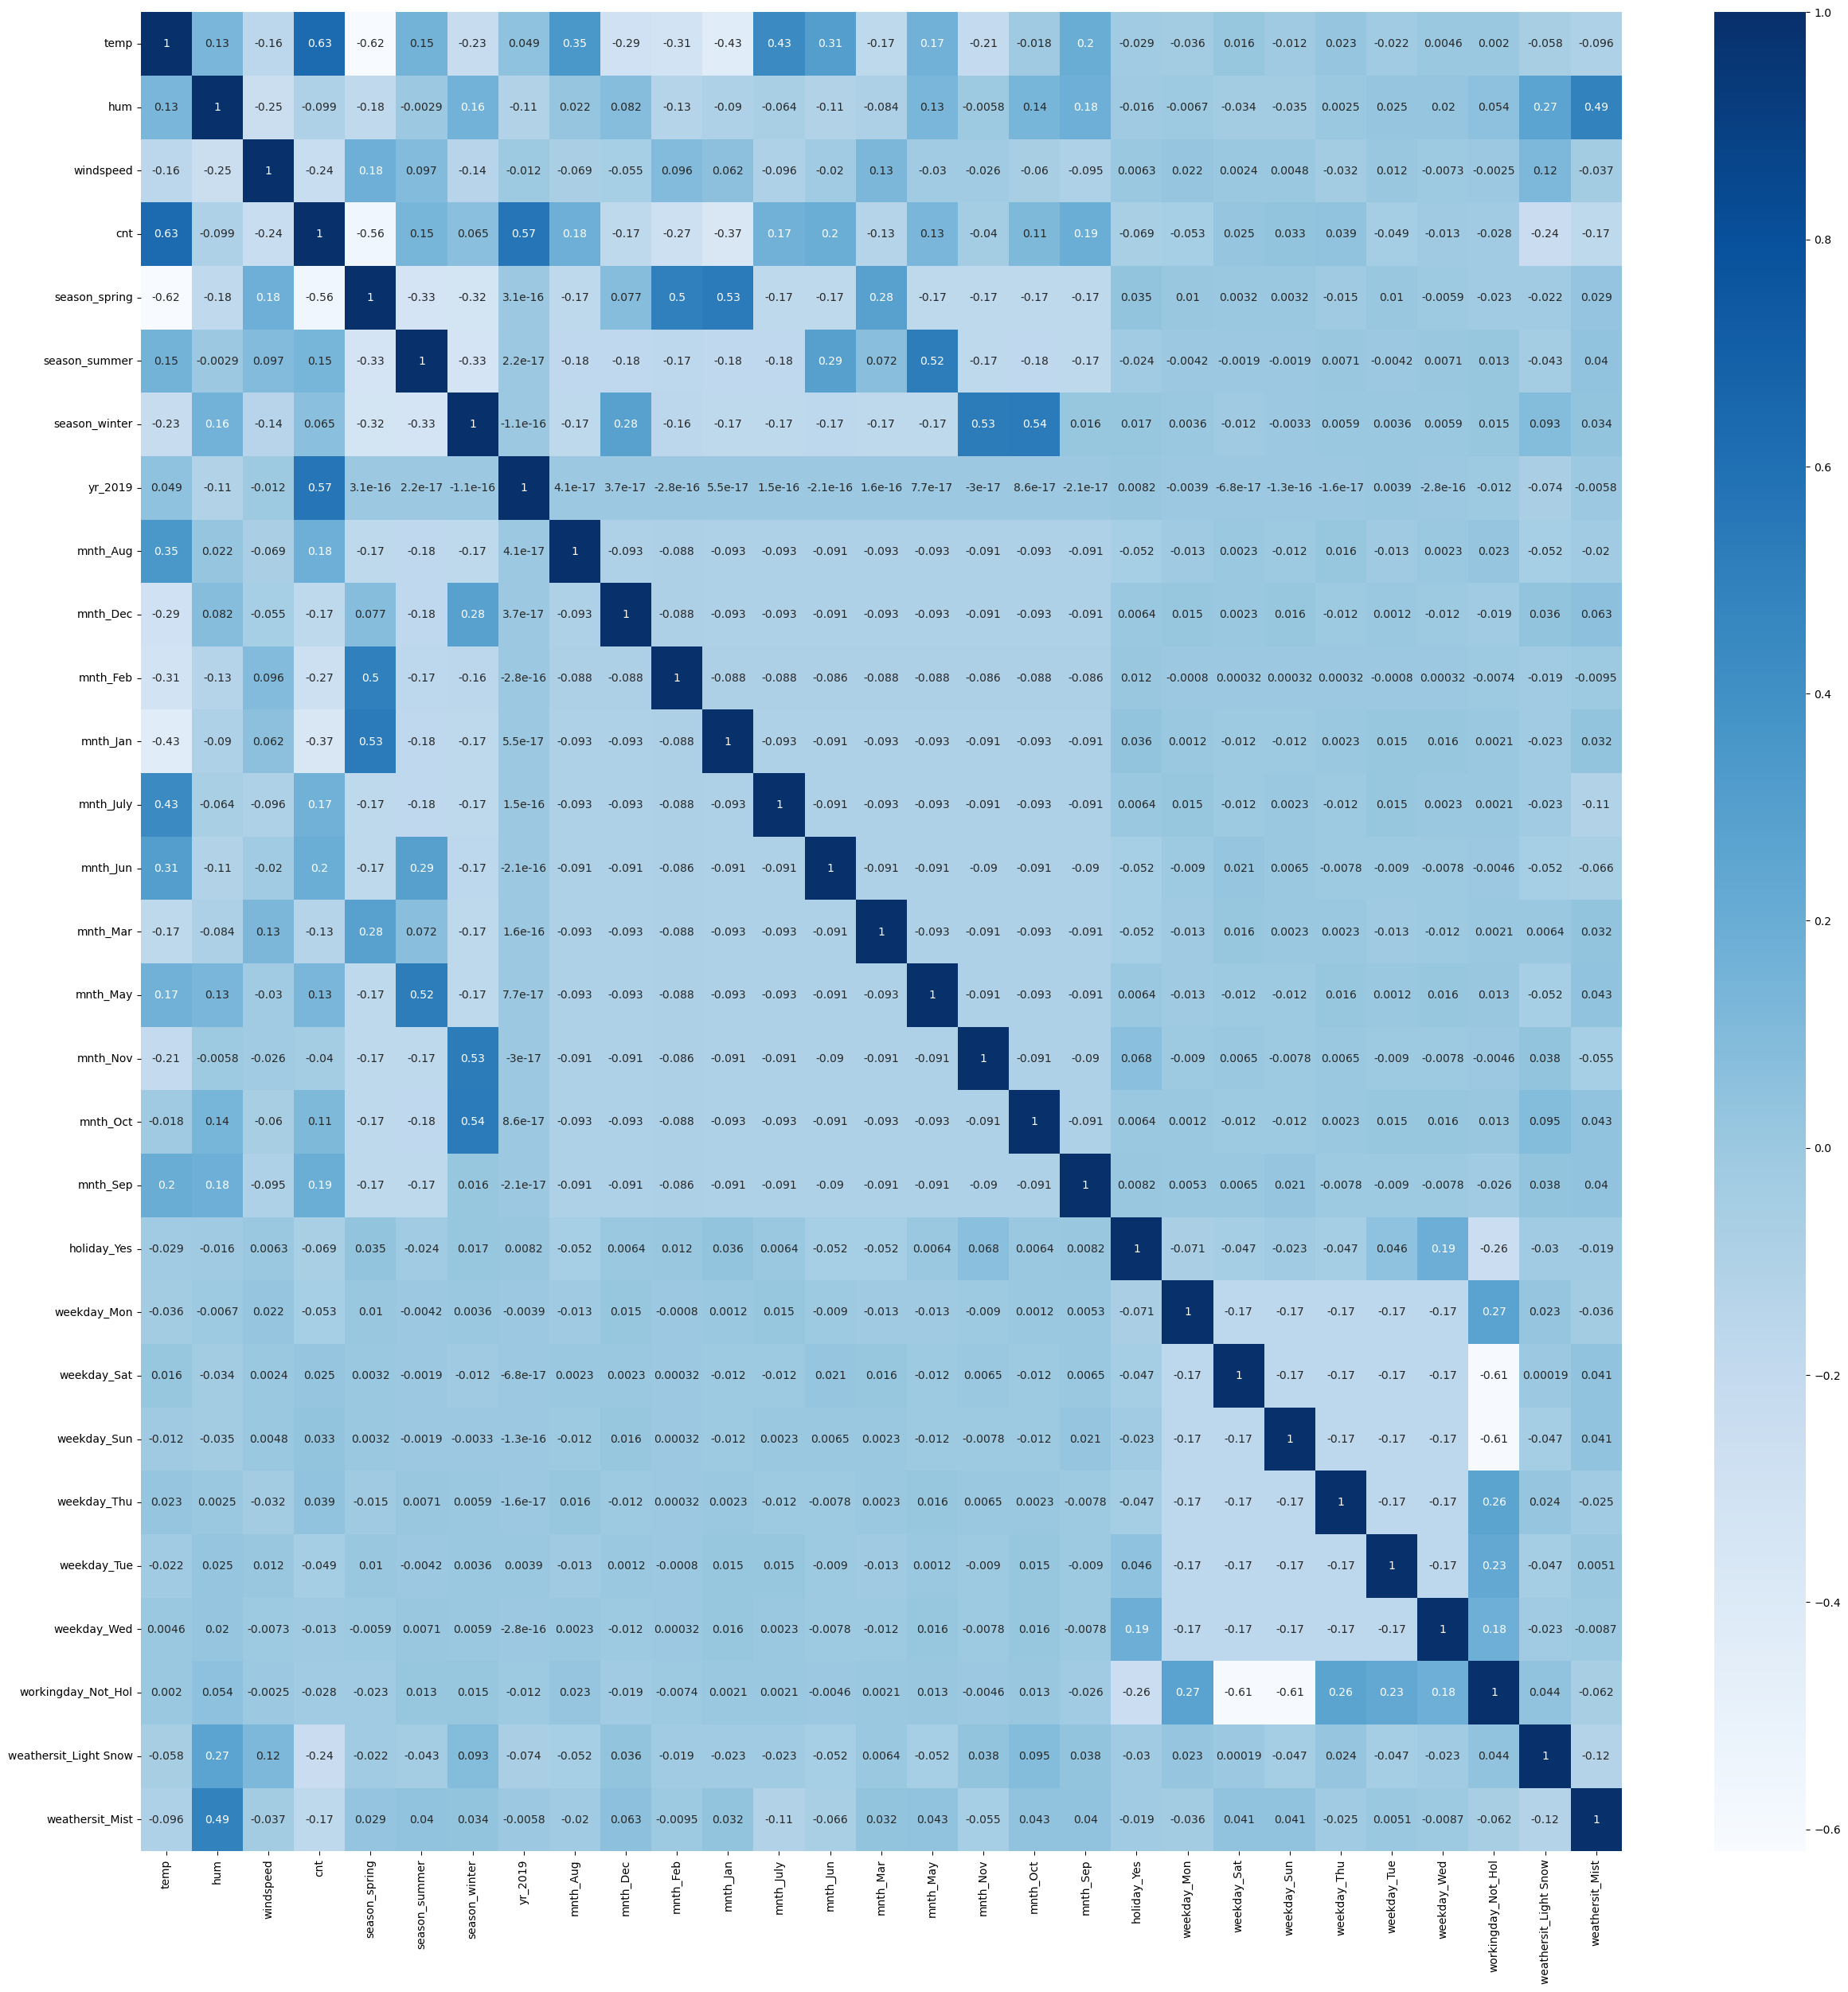

In [671]:
# Plotting heatmap helps in understanding if there is a relationship between different variables including the target variable

plt.figure(figsize=[30,30])
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [672]:
# Finding the absolute value of correlation between cnt and different variables
abs(df.corr().loc[:,'cnt']).sort_values(ascending=False)

cnt                      1.000000
temp                     0.627044
yr_2019                  0.569728
season_spring            0.561702
mnth_Jan                 0.367167
mnth_Feb                 0.273848
weathersit_Light Snow    0.240602
windspeed                0.235132
mnth_Jun                 0.195568
mnth_Sep                 0.194664
mnth_Aug                 0.182100
mnth_Dec                 0.173878
weathersit_Mist          0.170686
mnth_July                0.166236
season_summer            0.145325
mnth_May                 0.132553
mnth_Mar                 0.128456
mnth_Oct                 0.108846
hum                      0.098543
holiday_Yes              0.068764
season_winter            0.064619
weekday_Mon              0.052581
weekday_Tue              0.049471
mnth_Nov                 0.040344
weekday_Thu              0.038672
weekday_Sun              0.033227
workingday_Not_Hol       0.027640
weekday_Sat              0.025004
weekday_Wed              0.013282
Name: cnt, dty

### Manual model building

Let's start building the model on temp variable as we have seen in the previous heatmap that temp is highly correlated to cnt variable

In [673]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not_Hol,weathersit_Light Snow,weathersit_Mist
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [674]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In the further model building process we will keep adding the features to improve the model in the order of their correlation values. Also we will be deleting the variables based on p-value and VIF value.

### Model 1:

In [675]:
# Constant has to be added while using statmodel library as it doesn't have inherent constant embedded in it
X_train_man = sm.add_constant(X_train['temp'])


# Building the model
man = sm.OLS(y_train,X_train_man).fit()

In [676]:
man.params

const    0.169031
temp     0.640944
dtype: float64

In [677]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           2.46e-61
Time:                        23:37:57   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value is about 41% . We can definitely improve this model by adding more variables.

### Model 2:

In [678]:
X_train_man = sm.add_constant(X_train[['temp','yr_2019']])

man = sm.OLS(y_train,X_train_man).fit()

In [679]:
# Checking the statistical summary of the model
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.34e-130
Time:                        23:37:57   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr_2019        0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [680]:
# The following code is used to check the VIF of different features in the model
# We initially create a dataframe
vif = pd.DataFrame()

vif['Features'] = X_train_man.columns

# Calculating VIF
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

# Sorting the dataframe based on VIF values in descending order
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.26
1,temp,1.01
2,yr_2019,1.01


In [681]:
# Checking the coefficients of different features
man.params

const      0.079266
temp       0.584266
yr_2019    0.236739
dtype: float64

R-squared value is about 69.2% . p-values of all the features are less than 0.05 and VIF <5, so we don't need to delete any features. We can definitely improve this model by adding more variables.

### Model 3:

In [682]:

X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring']])

man = sm.OLS(y_train,X_train_man).fit()

In [683]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     477.7
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.81e-147
Time:                        23:37:57   Log-Likelihood:                 381.47
No. Observations:                 510   AIC:                            -754.9
Df Residuals:                     506   BIC:                            -738.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2016      0.019     10.769      0.000       0.165       0.238
temp              0.4181      0.029     14.646      0.000       0.362       0.474
yr_2019           0.2404      0.010     23.448      0.000       0.220       0.261
season_spring    -0.1434      0.015     -9.601      0.000      -0.173      -0.114
==============================================================================
Omnibus:                      103.017   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.850
Skew:                          -0.985   Prob(JB):                     1.70e-61
Kurtosis:                       6.047   Cond. No.                         8.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [684]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.52
1,temp,1.60
3,season_spring,1.58
2,yr_2019,1.01


R-squared value is about 73.9% and adjusted R-squared is about 73.7%. p-values of all the features are less than 0.05 and VIF <5, so we don't need to delete any features. We can add more features to improve this model.

### Model 4:

In [685]:
# Adding feature mnth_Jan
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','mnth_Jan']])

man = sm.OLS(y_train,X_train_man).fit()

In [686]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     360.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.85e-146
Time:                        23:37:57   Log-Likelihood:                 383.07
No. Observations:                 510   AIC:                            -756.1
Df Residuals:                     505   BIC:                            -735.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2069      0.019     10.939      0.000       0.170       0.244
temp              0.4091      0.029     14.144      0.000       0.352       0.466
yr_2019           0.2409      0.010     23.541      0.000       0.221       0.261
season_spring    -0.1321      0.016     -8.165      0.000      -0.164      -0.100
mnth_Jan         -0.0389      0.022     -1.787      0.075      -0.082       0.004
==============================================================================
Omnibus:                      106.858   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.732
Skew:                          -1.014   Prob(JB):                     6.06e-65
Kurtosis:                       6.131   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [687]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.85
3,season_spring,1.87
1,temp,1.65
4,mnth_Jan,1.48
2,yr_2019,1.01


R-squared value is about 74.1% and adjusted R-squared is about 73.9%. p-values of mnth_Jan is greater than 0.05.Hence dropping the feature even though  VIF <5, so we don't need to delete any features. We can add more features to improve this model.

In [688]:
X_train_man.drop('mnth_Jan',axis=1,inplace=True)

### Model 5:

In [689]:
# Adding feature mnth_Feb
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','mnth_Feb']])

man = sm.OLS(y_train,X_train_man).fit()

In [690]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     357.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          8.70e-146
Time:                        23:37:57   Log-Likelihood:                 381.51
No. Observations:                 510   AIC:                            -753.0
Df Residuals:                     505   BIC:                            -731.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2017      0.019     10.762      0.000       0.165       0.238
temp              0.4180      0.029     14.627      0.000       0.362       0.474
yr_2019           0.2404      0.010     23.427      0.000       0.220       0.261
season_spring    -0.1416      0.016     -8.747      0.000      -0.173      -0.110
mnth_Feb         -0.0065      0.023     -0.283      0.778      -0.052       0.039
==============================================================================
Omnibus:                      103.309   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.376
Skew:                          -0.988   Prob(JB):                     1.31e-61
Kurtosis:                       6.048   Cond. No.                         8.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [691]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.52
3,season_spring,1.86
1,temp,1.60
4,mnth_Feb,1.29
2,yr_2019,1.01


R-squared value is about 73.9% and adjusted R-squared is about 73.7% which is lesser than the previous model. p-values of mnth_Feb is greater than 0.05, hence deleting the feature mnth_Feb. We can add more features to improve this model.

In [692]:
X_train_man.drop('mnth_Feb',axis=1,inplace=True)

### Model 6:

In [693]:
# Adding feature weathersit_Light Snow
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow']])

man = sm.OLS(y_train,X_train_man).fit()

In [694]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     437.3
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.75e-162
Time:                        23:37:57   Log-Likelihood:                 420.38
No. Observations:                 510   AIC:                            -830.8
Df Residuals:                     505   BIC:                            -809.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2236      0.018     12.757      0.000       0.189       0.258
temp                      0.4003      0.027     15.079      0.000       0.348       0.452
yr_2019                   0.2357      0.010     24.749      0.000       0.217       0.254
season_spring            -0.1538      0.014    -11.063      0.000      -0.181      -0.126
weathersit_Light Snow    -0.2565      0.028     -9.124      0.000      -0.312      -0.201
==============================================================================
Omnibus:                       58.021   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.679
Skew:                          -0.689   Prob(JB):                     6.84e-24
Kurtosis:                       4.767   Cond. No.                         9.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [695]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.78
1,temp,1.61
3,season_spring,1.59
2,yr_2019,1.02
4,weathersit_Light Snow,1.01


R-squared value is about 77.6% and adjusted R-squared is about 77.4% . p-values is less than 0.05 and VIF <5, hence keeping the model as it is. We can add more features to improve this model.

### Model 7:

In [696]:
# Adding feature windspeed
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed']])

man = sm.OLS(y_train,X_train_man).fit()

In [697]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     375.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.07e-167
Time:                        23:37:57   Log-Likelihood:                 434.63
No. Observations:                 510   AIC:                            -857.3
Df Residuals:                     504   BIC:                            -831.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2761      0.020     14.048      0.000       0.238       0.315
temp                      0.3871      0.026     14.913      0.000       0.336       0.438
yr_2019                   0.2368      0.009     25.538      0.000       0.219       0.255
season_spring            -0.1470      0.014    -10.821      0.000      -0.174      -0.120
weathersit_Light Snow    -0.2431      0.027     -8.849      0.000      -0.297      -0.189
windspeed                -0.1496      0.028     -5.382      0.000      -0.204      -0.095
==============================================================================
Omnibus:                       53.796   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.285
Skew:                          -0.644   Prob(JB):                     2.76e-22
Kurtosis:                       4.736   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [698]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,18.29
1,temp,1.62
3,season_spring,1.61
5,windspeed,1.05
2,yr_2019,1.02
4,weathersit_Light Snow,1.02


R-squared value is about 78.8% and adjusted R-squared is about 78.6% . p-values is less than 0.05 and VIF <5, hence keeping the model as it is. We can add more features to improve this model.

### Model 8:

In [699]:
# Adding feature mnth_Jun
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Jun']])

man = sm.OLS(y_train,X_train_man).fit()

In [700]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          5.50e-166
Time:                        23:37:57   Log-Likelihood:                 434.76
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     503   BIC:                            -825.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2774      0.020     13.991      0.000       0.238       0.316
temp                      0.3836      0.027     14.273      0.000       0.331       0.436
yr_2019                   0.2368      0.009     25.524      0.000       0.219       0.255
season_spring            -0.1472      0.014    -10.821      0.000      -0.174      -0.120
weathersit_Light Snow    -0.2425      0.028     -8.813      0.000      -0.297      -0.188
windspeed                -0.1500      0.028     -5.389      0.000      -0.205      -0.095
mnth_Jun                  0.0093      0.018      0.510      0.611      -0.026       0.045
==============================================================================
Omnibus:                       53.582   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.077
Skew:                          -0.641   Prob(JB):                     3.06e-22
Kurtosis:                       4.738   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value is same as the previous model which means the variable mnth_Jun is not adding any value . p-values is greater than 0.05 , hence dropping the variable.

In [701]:
X_train_man.drop('mnth_Jun',axis=1,inplace=True)

### Model 9:

In [702]:
# Adding feature mnth_Sep
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep']])

man = sm.OLS(y_train,X_train_man).fit()

In [703]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     320.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.06e-168
Time:                        23:37:57   Log-Likelihood:                 440.03
No. Observations:                 510   AIC:                            -866.1
Df Residuals:                     503   BIC:                            -836.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2745      0.019     14.095      0.000       0.236       0.313
temp                      0.3760      0.026     14.501      0.000       0.325       0.427
yr_2019                   0.2372      0.009     25.829      0.000       0.219       0.255
season_spring            -0.1452      0.013    -10.777      0.000      -0.172      -0.119
weathersit_Light Snow    -0.2471      0.027     -9.072      0.000      -0.301      -0.194
windspeed                -0.1418      0.028     -5.132      0.000      -0.196      -0.088
mnth_Sep                  0.0565      0.017      3.282      0.001       0.023       0.090
==============================================================================
Omnibus:                       55.741   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.460
Skew:                          -0.687   Prob(JB):                     1.13e-21
Kurtosis:                       4.628   Cond. No.                         9.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [704]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,18.30
1,temp,1.65
3,season_spring,1.61
5,windspeed,1.06
6,mnth_Sep,1.06
2,yr_2019,1.02
4,weathersit_Light Snow,1.02


R-squared value is about 79.3% and adjusted R-squared is about 79% . p-values is less than 0.05 and VIF <5, hence keeping the model as it is. We can add more features to improve this model.

### Model 10:

In [705]:
# Adding feature mnth_Aug
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','mnth_Aug']])

man = sm.OLS(y_train,X_train_man).fit()

In [706]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     274.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.06e-167
Time:                        23:37:58   Log-Likelihood:                 440.38
No. Observations:                 510   AIC:                            -864.8
Df Residuals:                     502   BIC:                            -830.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2718      0.020     13.769      0.000       0.233       0.311
temp                      0.3845      0.028     13.793      0.000       0.330       0.439
yr_2019                   0.2373      0.009     25.827      0.000       0.219       0.255
season_spring            -0.1445      0.013    -10.703      0.000      -0.171      -0.118
weathersit_Light Snow    -0.2477      0.027     -9.089      0.000      -0.301      -0.194
windspeed                -0.1433      0.028     -5.173      0.000      -0.198      -0.089
mnth_Sep                  0.0537      0.018      3.055      0.002       0.019       0.088
mnth_Aug                 -0.0142      0.017     -0.829      0.408      -0.048       0.019
==============================================================================
Omnibus:                       56.871   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.866
Skew:                          -0.701   Prob(JB):                     5.61e-22
Kurtosis:                       4.624   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value is about 79.3% and adjusted R-squared is about 79% . p-values is greater than 0.05 even though VIF <5, hence dropping the mnth_Aug feature . We can add more features to improve this model.

In [707]:
X_train_man.drop('mnth_Aug',axis=1,inplace=True)

### Model 11:

In [708]:
# Adding feature mnth_Dec
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','mnth_Dec']])

man = sm.OLS(y_train,X_train_man).fit()

In [709]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     274.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          5.01e-167
Time:                        23:37:58   Log-Likelihood:                 440.17
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     502   BIC:                            -830.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2784      0.021     13.298      0.000       0.237       0.320
temp                      0.3716      0.027     13.606      0.000       0.318       0.425
yr_2019                   0.2372      0.009     25.807      0.000       0.219       0.255
season_spring            -0.1463      0.014    -10.717      0.000      -0.173      -0.119
weathersit_Light Snow    -0.2474      0.027     -9.076      0.000      -0.301      -0.194
windspeed                -0.1434      0.028     -5.154      0.000      -0.198      -0.089
mnth_Sep                  0.0561      0.017      3.248      0.001       0.022       0.090
mnth_Dec                 -0.0090      0.017     -0.515      0.607      -0.043       0.025
==============================================================================
Omnibus:                       56.536   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.299
Skew:                          -0.694   Prob(JB):                     4.51e-22
Kurtosis:                       4.643   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [710]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.12
1,temp,1.83
3,season_spring,1.65
7,mnth_Dec,1.13
5,windspeed,1.07
6,mnth_Sep,1.06
2,yr_2019,1.02
4,weathersit_Light Snow,1.02


R-squared value is about 79.3% and adjusted R-squared is about 79% . p-values for mnth_Dec is greater than 0.05 even though VIF <5, hence dropping the mnth_Dec feature . We can add more features to improve this model.

In [711]:
X_train_man.drop('mnth_Dec',axis=1,inplace=True)

### Model 12:

In [712]:
# Adding feature weathersit_Mist
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist']])

man = sm.OLS(y_train,X_train_man).fit()

In [713]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     322.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.11e-181
Time:                        23:37:58   Log-Likelihood:                 473.20
No. Observations:                 510   AIC:                            -930.4
Df Residuals:                     502   BIC:                            -896.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3181      0.019     16.744      0.000       0.281       0.355
temp                      0.3507      0.025     14.310      0.000       0.303       0.399
yr_2019                   0.2368      0.009     27.491      0.000       0.220       0.254
season_spring            -0.1515      0.013    -11.967      0.000      -0.176      -0.127
weathersit_Light Snow    -0.2762      0.026    -10.713      0.000      -0.327      -0.226
windspeed                -0.1475      0.026     -5.686      0.000      -0.198      -0.097
mnth_Sep                  0.0652      0.016      4.026      0.000       0.033       0.097
weathersit_Mist          -0.0763      0.009     -8.350      0.000      -0.094      -0.058
==============================================================================
Omnibus:                       59.766   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.712
Skew:                          -0.622   Prob(JB):                     2.78e-31
Kurtosis:                       5.252   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [714]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,19.79
1,temp,1.68
3,season_spring,1.62
5,windspeed,1.06
6,mnth_Sep,1.06
4,weathersit_Light Snow,1.04
7,weathersit_Mist,1.04
2,yr_2019,1.02


R-squared value is about 81.8% and adjusted R-squared is about 81.5% . p-values is less than 0.05 and VIF <5, hence keeping the feature weathersit_Mist . We can add more features to improve this model.

### Model 13:

In [715]:
# Adding feature mnth_July
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July']])

man = sm.OLS(y_train,X_train_man).fit()

In [716]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          2.31e-183
Time:                        23:37:58   Log-Likelihood:                 481.47
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     501   BIC:                            -906.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3021      0.019     15.795      0.000       0.264       0.340
temp                      0.3953      0.027     14.909      0.000       0.343       0.447
yr_2019                   0.2355      0.008     27.742      0.000       0.219       0.252
season_spring            -0.1456      0.013    -11.601      0.000      -0.170      -0.121
weathersit_Light Snow    -0.2742      0.025    -10.797      0.000      -0.324      -0.224
windspeed                -0.1516      0.026     -5.930      0.000      -0.202      -0.101
mnth_Sep                  0.0528      0.016      3.257      0.001       0.021       0.085
weathersit_Mist          -0.0789      0.009     -8.740      0.000      -0.097      -0.061
mnth_July                -0.0728      0.018     -4.064      0.000      -0.108      -0.038
==============================================================================
Omnibus:                       57.146   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.269
Skew:                          -0.599   Prob(JB):                     1.15e-29
Kurtosis:                       5.199   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [717]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.68
1,temp,2.02
3,season_spring,1.64
8,mnth_July,1.28
6,mnth_Sep,1.10
5,windspeed,1.06
4,weathersit_Light Snow,1.04
7,weathersit_Mist,1.04
2,yr_2019,1.02


R-squared value is about 82.4% and adjusted R-squared is about 82.1% . p-values is less than 0.05 and VIF <5, hence keeping the feature mnth_July . We can add more features to improve this model.

### Model 14:

In [718]:
# Adding feature season_summer
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','season_summer']])

man = sm.OLS(y_train,X_train_man).fit()

In [719]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     259.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.01e-182
Time:                        23:37:58   Log-Likelihood:                 481.49
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     500   BIC:                            -900.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3025      0.019     15.692      0.000       0.265       0.340
temp                      0.3956      0.027     14.875      0.000       0.343       0.448
yr_2019                   0.2355      0.008     27.715      0.000       0.219       0.252
season_spring            -0.1464      0.013    -10.989      0.000      -0.173      -0.120
weathersit_Light Snow    -0.2746      0.025    -10.772      0.000      -0.325      -0.224
windspeed                -0.1508      0.026     -5.815      0.000      -0.202      -0.100
mnth_Sep                  0.0520      0.017      3.084      0.002       0.019       0.085
weathersit_Mist          -0.0788      0.009     -8.719      0.000      -0.097      -0.061
mnth_July                -0.0736      0.019     -3.964      0.000      -0.110      -0.037
season_summer            -0.0020      0.011     -0.178      0.859      -0.024       0.020
==============================================================================
Omnibus:                       57.492   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.678
Skew:                          -0.601   Prob(JB):                     5.69e-30
Kurtosis:                       5.212   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [720]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.96
1,temp,2.03
3,season_spring,1.84
8,mnth_July,1.37
9,season_summer,1.33
6,mnth_Sep,1.19
5,windspeed,1.09
4,weathersit_Light Snow,1.05
7,weathersit_Mist,1.04
2,yr_2019,1.02


R-squared value is about 82.4% and adjusted R-squared is about 82.1% . p-values for season_summer is more than 0.05 even though VIF <5 feature season_summer will be dropped . We can add more features to improve this model.

In [721]:
X_train_man.drop('season_summer',axis=1,inplace=True)

### Model 15:

In [722]:
# Adding feature mnth_May
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_May']])

man = sm.OLS(y_train,X_train_man).fit()

In [723]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     259.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.08e-182
Time:                        23:37:58   Log-Likelihood:                 481.76
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     500   BIC:                            -901.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3022      0.019     15.795      0.000       0.265       0.340
temp                      0.3921      0.027     14.585      0.000       0.339       0.445
yr_2019                   0.2359      0.009     27.731      0.000       0.219       0.253
season_spring            -0.1448      0.013    -11.493      0.000      -0.170      -0.120
weathersit_Light Snow    -0.2735      0.025    -10.755      0.000      -0.323      -0.224
windspeed                -0.1514      0.026     -5.922      0.000      -0.202      -0.101
mnth_Sep                  0.0550      0.016      3.336      0.001       0.023       0.087
weathersit_Mist          -0.0794      0.009     -8.768      0.000      -0.097      -0.062
mnth_July                -0.0702      0.018     -3.855      0.000      -0.106      -0.034
mnth_May                  0.0120      0.016      0.752      0.453      -0.019       0.043
==============================================================================
Omnibus:                       57.333   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.046
Skew:                          -0.596   Prob(JB):                     2.87e-30
Kurtosis:                       5.232   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value is about 82.4% and adjusted R-squared is about 82.1% . p-values for mnth_May is more than 0.05 even though VIF <5 feature mnth_May will be dropped . We can add more features to improve this model.

In [724]:
X_train_man.drop('mnth_May',axis=1,inplace=True)

### Model 16:

In [725]:
# Adding feature mnth_Mar
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar']])

man = sm.OLS(y_train,X_train_man).fit()

In [726]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.8
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.26e-183
Time:                        23:37:58   Log-Likelihood:                 484.05
No. Observations:                 510   AIC:                            -948.1
Df Residuals:                     500   BIC:                            -905.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3033      0.019     15.919      0.000       0.266       0.341
temp                      0.3925      0.026     14.845      0.000       0.341       0.444
yr_2019                   0.2355      0.008     27.850      0.000       0.219       0.252
season_spring            -0.1528      0.013    -11.844      0.000      -0.178      -0.127
weathersit_Light Snow    -0.2761      0.025    -10.908      0.000      -0.326      -0.226
windspeed                -0.1565      0.026     -6.124      0.000      -0.207      -0.106
mnth_Sep                  0.0549      0.016      3.391      0.001       0.023       0.087
weathersit_Mist          -0.0788      0.009     -8.774      0.000      -0.097      -0.061
mnth_July                -0.0702      0.018     -3.929      0.000      -0.105      -0.035
mnth_Mar                  0.0336      0.015      2.256      0.024       0.004       0.063
==============================================================================
Omnibus:                       59.309   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.477
Skew:                          -0.643   Prob(JB):                     7.66e-29
Kurtosis:                       5.107   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [727]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.69
1,temp,2.03
3,season_spring,1.75
8,mnth_July,1.28
9,mnth_Mar,1.12
6,mnth_Sep,1.10
5,windspeed,1.07
4,weathersit_Light Snow,1.04
7,weathersit_Mist,1.04
2,yr_2019,1.02


R-squared value is about 82.5% and adjusted R-squared is about 82.2% . p-values for mnth_Mar is less than 0.05 and VIF <5 feature mnth_Mar will be kept as it is . We can add more features to improve this model.

### Model 17:

In [728]:
# Adding feature mnth_Oct
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct']])

man = sm.OLS(y_train,X_train_man).fit()

In [729]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.09e-184
Time:                        23:37:58   Log-Likelihood:                 490.43
No. Observations:                 510   AIC:                            -958.9
Df Residuals:                     499   BIC:                            -912.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2911      0.019     15.201      0.000       0.253       0.329
temp                      0.3997      0.026     15.246      0.000       0.348       0.451
yr_2019                   0.2358      0.008     28.215      0.000       0.219       0.252
season_spring            -0.1440      0.013    -11.086      0.000      -0.170      -0.119
weathersit_Light Snow    -0.2899      0.025    -11.449      0.000      -0.340      -0.240
windspeed                -0.1545      0.025     -6.114      0.000      -0.204      -0.105
mnth_Sep                  0.0624      0.016      3.868      0.000       0.031       0.094
weathersit_Mist          -0.0796      0.009     -8.957      0.000      -0.097      -0.062
mnth_July                -0.0644      0.018     -3.631      0.000      -0.099      -0.030
mnth_Mar                  0.0371      0.015      2.513      0.012       0.008       0.066
mnth_Oct                  0.0557      0.016      3.554      0.000       0.025       0.086
==============================================================================
Omnibus:                       78.300   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.189
Skew:                          -0.790   Prob(JB):                     3.05e-42
Kurtosis:                       5.550   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [730]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.39
1,temp,2.04
3,season_spring,1.81
8,mnth_July,1.30
9,mnth_Mar,1.13
6,mnth_Sep,1.12
10,mnth_Oct,1.11
4,weathersit_Light Snow,1.07
5,windspeed,1.07
7,weathersit_Mist,1.04


R-squared value is about 83.0% and adjusted R-squared is about 82.6% . p-values for mnth_Oct is less than 0.05 and VIF <5 feature mnth_Oct will be kept as it is . We can add more features to improve this model.

### Model 18:

In [731]:
# Adding feature hum

X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum']])

man = sm.OLS(y_train,X_train_man).fit()

In [732]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.40e-186
Time:                        23:37:58   Log-Likelihood:                 497.75
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     498   BIC:                            -920.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3782      0.030     12.746      0.000       0.320       0.437
temp                      0.4169      0.026     15.876      0.000       0.365       0.468
yr_2019                   0.2326      0.008     28.057      0.000       0.216       0.249
season_spring            -0.1450      0.013    -11.309      0.000      -0.170      -0.120
weathersit_Light Snow    -0.2505      0.027     -9.262      0.000      -0.304      -0.197
windspeed                -0.1838      0.026     -7.044      0.000      -0.235      -0.133
mnth_Sep                  0.0661      0.016      4.145      0.000       0.035       0.097
weathersit_Mist          -0.0567      0.011     -5.336      0.000      -0.078      -0.036
mnth_July                -0.0709      0.018     -4.031      0.000      -0.105      -0.036
mnth_Mar                  0.0345      0.015      2.364      0.018       0.006       0.063
mnth_Oct                  0.0630      0.016      4.044      0.000       0.032       0.094
hum                      -0.1450      0.038     -3.809      0.000      -0.220      -0.070
==============================================================================
Omnibus:                       77.096   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.430
Skew:                          -0.780   Prob(JB):                     2.00e-41
Kurtosis:                       5.527   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [733]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.75
1,temp,2.10
11,hum,1.84
3,season_spring,1.81
7,weathersit_Mist,1.53
8,mnth_July,1.31
4,weathersit_Light Snow,1.25
5,windspeed,1.17
6,mnth_Sep,1.13
9,mnth_Mar,1.13


R-squared value is about 83.5% and adjusted R-squared is about 83.1% . p-values for hum is less than 0.05 and VIF <5 feature mnth_Oct will be kept as it is . We can add more features to improve this model.

### Model 19:

In [734]:
# Adding feature holiday_Yes

X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum','holiday_Yes']])

man = sm.OLS(y_train,X_train_man).fit()

In [735]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.8
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          7.72e-188
Time:                        23:37:58   Log-Likelihood:                 503.56
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     497   BIC:                            -926.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3817      0.029     12.989      0.000       0.324       0.439
temp                      0.4131      0.026     15.881      0.000       0.362       0.464
yr_2019                   0.2324      0.008     28.319      0.000       0.216       0.249
season_spring            -0.1436      0.013    -11.311      0.000      -0.169      -0.119
weathersit_Light Snow    -0.2540      0.027     -9.484      0.000      -0.307      -0.201
windspeed                -0.1821      0.026     -7.053      0.000      -0.233      -0.131
mnth_Sep                  0.0692      0.016      4.373      0.000       0.038       0.100
weathersit_Mist          -0.0585      0.011     -5.557      0.000      -0.079      -0.038
mnth_July                -0.0719      0.017     -4.133      0.000      -0.106      -0.038
mnth_Mar                  0.0311      0.014      2.145      0.032       0.003       0.059
mnth_Oct                  0.0632      0.015      4.098      0.000       0.033       0.093
hum                      -0.1436      0.038     -3.810      0.000      -0.218      -0.070
holiday_Yes              -0.0876      0.026     -3.383      0.001      -0.138      -0.037
==============================================================================
Omnibus:                       67.347   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.418
Skew:                          -0.704   Prob(JB):                     1.78e-34
Kurtosis:                       5.309   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [736]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.81
1,temp,2.11
11,hum,1.84
3,season_spring,1.81
7,weathersit_Mist,1.53
8,mnth_July,1.31
4,weathersit_Light Snow,1.25
5,windspeed,1.17
6,mnth_Sep,1.13
9,mnth_Mar,1.13


R-squared value is about 83.8% and adjusted R-squared is about 83.4% . p-values for holiday_Yes is less than 0.05 and VIF <5 feature holiday_Yes will be kept as it is . We can add more features to improve this model.

### Model 20:

In [737]:
# Adding feature season_winter

X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum','holiday_Yes','season_winter']])

man = sm.OLS(y_train,X_train_man).fit()

In [738]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.58e-188
Time:                        23:37:58   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     496   BIC:                            -928.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3463      0.032     10.985      0.000       0.284       0.408
temp                      0.4666      0.032     14.786      0.000       0.405       0.529
yr_2019                   0.2309      0.008     28.306      0.000       0.215       0.247
season_spring            -0.1182      0.015     -7.746      0.000      -0.148      -0.088
weathersit_Light Snow    -0.2506      0.027     -9.420      0.000      -0.303      -0.198
windspeed                -0.1765      0.026     -6.866      0.000      -0.227      -0.126
mnth_Sep                  0.0672      0.016      4.275      0.000       0.036       0.098
weathersit_Mist          -0.0548      0.011     -5.210      0.000      -0.076      -0.034
mnth_July                -0.0743      0.017     -4.300      0.000      -0.108      -0.040
mnth_Mar                  0.0345      0.014      2.395      0.017       0.006       0.063
mnth_Oct                  0.0366      0.018      2.063      0.040       0.002       0.072
hum                      -0.1593      0.038     -4.216      0.000      -0.233      -0.085
holiday_Yes              -0.0921      0.026     -3.580      0.000      -0.143      -0.042
season_winter             0.0426      0.014      2.949      0.003       0.014       0.071
==============================================================================
Omnibus:                       66.897   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.456
Skew:                          -0.691   Prob(JB):                     3.91e-35
Kurtosis:                       5.356   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [739]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.74
1,temp,3.15
3,season_spring,2.66
13,season_winter,2.41
11,hum,1.88
7,weathersit_Mist,1.56
10,mnth_Oct,1.51
8,mnth_July,1.31
4,weathersit_Light Snow,1.25
5,windspeed,1.18


R-squared value is about 84.1% and adjusted R-squared is about 83.7% . p-values for season_winter is less than 0.05 and VIF <5 feature season_winter will be kept as it is . We can add more features to improve this model.

### Model 21:

In [740]:
# Adding feature weekday_Mon
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum','holiday_Yes','season_winter','weekday_Mon']])

man = sm.OLS(y_train,X_train_man).fit()

In [741]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.8
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.68e-188
Time:                        23:37:58   Log-Likelihood:                 509.88
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     495   BIC:                            -926.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3515      0.032     11.138      0.000       0.289       0.413
temp                      0.4642      0.031     14.736      0.000       0.402       0.526
yr_2019                   0.2305      0.008     28.315      0.000       0.214       0.246
season_spring            -0.1185      0.015     -7.788      0.000      -0.148      -0.089
weathersit_Light Snow    -0.2502      0.027     -9.431      0.000      -0.302      -0.198
windspeed                -0.1751      0.026     -6.828      0.000      -0.225      -0.125
mnth_Sep                  0.0670      0.016      4.279      0.000       0.036       0.098
weathersit_Mist          -0.0554      0.011     -5.278      0.000      -0.076      -0.035
mnth_July                -0.0733      0.017     -4.247      0.000      -0.107      -0.039
mnth_Mar                  0.0333      0.014      2.316      0.021       0.005       0.062
mnth_Oct                  0.0374      0.018      2.111      0.035       0.003       0.072
hum                      -0.1597      0.038     -4.240      0.000      -0.234      -0.086
holiday_Yes              -0.0958      0.026     -3.723      0.000      -0.146      -0.045
season_winter             0.0424      0.014      2.940      0.003       0.014       0.071
weekday_Mon              -0.0214      0.011     -1.920      0.055      -0.043       0.000
==============================================================================
Omnibus:                       65.754   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.667
Skew:                          -0.665   Prob(JB):                     4.76e-36
Kurtosis:                       5.426   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value is about 84.2% and adjusted R-squared is about 83.8% . p-values for weekday_Mon is more than 0.05 and even though theVIF <5 feature weekday_Mon will be dropped as it is not significant.

In [742]:
X_train_man.drop('weekday_Mon',axis=1,inplace=True)

### Model 22:

In [743]:
# Adding feature weekday_Tue
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum','holiday_Yes','season_winter','weekday_Tue']])

man = sm.OLS(y_train,X_train_man).fit()

In [744]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.7
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.11e-188
Time:                        23:37:59   Log-Likelihood:                 509.77
No. Observations:                 510   AIC:                            -989.5
Df Residuals:                     495   BIC:                            -926.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3453      0.031     10.976      0.000       0.283       0.407
temp                      0.4654      0.031     14.781      0.000       0.404       0.527
yr_2019                   0.2314      0.008     28.422      0.000       0.215       0.247
season_spring            -0.1183      0.015     -7.768      0.000      -0.148      -0.088
weathersit_Light Snow    -0.2545      0.027     -9.561      0.000      -0.307      -0.202
windspeed                -0.1732      0.026     -6.740      0.000      -0.224      -0.123
mnth_Sep                  0.0673      0.016      4.297      0.000       0.037       0.098
weathersit_Mist          -0.0559      0.011     -5.316      0.000      -0.077      -0.035
mnth_July                -0.0724      0.017     -4.187      0.000      -0.106      -0.038
mnth_Mar                  0.0346      0.014      2.408      0.016       0.006       0.063
mnth_Oct                  0.0369      0.018      2.083      0.038       0.002       0.072
hum                      -0.1536      0.038     -4.063      0.000      -0.228      -0.079
holiday_Yes              -0.0907      0.026     -3.530      0.000      -0.141      -0.040
season_winter             0.0434      0.014      3.008      0.003       0.015       0.072
weekday_Tue              -0.0209      0.011     -1.861      0.063      -0.043       0.001
==============================================================================
Omnibus:                       69.392   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.791
Skew:                          -0.718   Prob(JB):                     4.47e-36
Kurtosis:                       5.366   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value is about 84.2% and adjusted R-squared is about 83.8% . p-values for weekday_Tue is more than 0.05 feature weekday_Tue will be dropped as it is not significant.

In [745]:
X_train_man.drop('weekday_Tue',axis=1,inplace=True)

### Model 23:

In [746]:
# Adding feature mnth_Nov
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum','holiday_Yes','season_winter','mnth_Nov']])

man = sm.OLS(y_train,X_train_man).fit()

In [747]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.86e-187
Time:                        23:37:59   Log-Likelihood:                 508.21
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     495   BIC:                            -922.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3465      0.032     10.982      0.000       0.284       0.408
temp                      0.4670      0.032     14.788      0.000       0.405       0.529
yr_2019                   0.2308      0.008     28.272      0.000       0.215       0.247
season_spring            -0.1185      0.015     -7.757      0.000      -0.148      -0.088
weathersit_Light Snow    -0.2500      0.027     -9.385      0.000      -0.302      -0.198
windspeed                -0.1752      0.026     -6.796      0.000      -0.226      -0.125
mnth_Sep                  0.0654      0.016      4.095      0.000       0.034       0.097
weathersit_Mist          -0.0548      0.011     -5.206      0.000      -0.076      -0.034
mnth_July                -0.0746      0.017     -4.313      0.000      -0.109      -0.041
mnth_Mar                  0.0344      0.014      2.385      0.017       0.006       0.063
mnth_Oct                  0.0293      0.021      1.395      0.164      -0.012       0.071
hum                      -0.1600      0.038     -4.232      0.000      -0.234      -0.086
holiday_Yes              -0.0900      0.026     -3.468      0.001      -0.141      -0.039
season_winter             0.0497      0.018      2.746      0.006       0.014       0.085
mnth_Nov                 -0.0133      0.021     -0.649      0.516      -0.054       0.027
==============================================================================
Omnibus:                       66.183   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.352
Skew:                          -0.684   Prob(JB):                     1.12e-34
Kurtosis:                       5.342   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value dropped  to 84.1% and adjusted R-squared dropped to 83.7% . p-values for mnth_Nov is more than 0.05  feature mnth_Nov will be dropped as it is not significant.

In [748]:
X_train_man.drop('mnth_Nov',axis=1,inplace=True)

### Model 24:

In [749]:
# Adding feature weekday_Thu
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum','holiday_Yes','season_winter','weekday_Thu']])

man = sm.OLS(y_train,X_train_man).fit()

In [750]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.8
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.13e-187
Time:                        23:37:59   Log-Likelihood:                 508.72
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     495   BIC:                            -923.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3434      0.032     10.865      0.000       0.281       0.406
temp                      0.4663      0.032     14.782      0.000       0.404       0.528
yr_2019                   0.2307      0.008     28.288      0.000       0.215       0.247
season_spring            -0.1175      0.015     -7.696      0.000      -0.147      -0.087
weathersit_Light Snow    -0.2486      0.027     -9.328      0.000      -0.301      -0.196
windspeed                -0.1760      0.026     -6.850      0.000      -0.226      -0.126
mnth_Sep                  0.0672      0.016      4.277      0.000       0.036       0.098
weathersit_Mist          -0.0542      0.011     -5.148      0.000      -0.075      -0.034
mnth_July                -0.0742      0.017     -4.295      0.000      -0.108      -0.040
mnth_Mar                  0.0341      0.014      2.365      0.018       0.006       0.062
mnth_Oct                  0.0364      0.018      2.049      0.041       0.002       0.071
hum                      -0.1586      0.038     -4.199      0.000      -0.233      -0.084
holiday_Yes              -0.0902      0.026     -3.501      0.001      -0.141      -0.040
season_winter             0.0432      0.014      2.993      0.003       0.015       0.072
weekday_Thu               0.0138      0.012      1.192      0.234      -0.009       0.037
==============================================================================
Omnibus:                       64.773   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.627
Skew:                          -0.667   Prob(JB):                     2.65e-34
Kurtosis:                       5.344   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value is  84.2% and adjusted R-squared is  83.7% . p-values for weekday_Thu is more than 0.05,  feature weekday_Thu will be dropped as it is not significant.

In [751]:
X_train_man.drop('weekday_Thu',axis=1,inplace=True)

### Model 25:

In [752]:
# Adding feature weekday_Sun
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum','holiday_Yes','season_winter','weekday_Sun']])

man = sm.OLS(y_train,X_train_man).fit()

In [753]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          7.43e-188
Time:                        23:37:59   Log-Likelihood:                 509.16
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3428      0.032     10.854      0.000       0.281       0.405
temp                      0.4662      0.032     14.793      0.000       0.404       0.528
yr_2019                   0.2308      0.008     28.328      0.000       0.215       0.247
season_spring            -0.1184      0.015     -7.766      0.000      -0.148      -0.088
weathersit_Light Snow    -0.2505      0.027     -9.427      0.000      -0.303      -0.198
windspeed                -0.1767      0.026     -6.883      0.000      -0.227      -0.126
mnth_Sep                  0.0667      0.016      4.250      0.000       0.036       0.098
weathersit_Mist          -0.0563      0.011     -5.331      0.000      -0.077      -0.036
mnth_July                -0.0753      0.017     -4.358      0.000      -0.109      -0.041
mnth_Mar                  0.0342      0.014      2.373      0.018       0.006       0.062
mnth_Oct                  0.0365      0.018      2.061      0.040       0.002       0.071
hum                      -0.1560      0.038     -4.128      0.000      -0.230      -0.082
holiday_Yes              -0.0912      0.026     -3.548      0.000      -0.142      -0.041
season_winter             0.0426      0.014      2.955      0.003       0.014       0.071
weekday_Sun               0.0177      0.012      1.506      0.133      -0.005       0.041
==============================================================================
Omnibus:                       72.097   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.021
Skew:                          -0.748   Prob(JB):                     5.39e-37
Kurtosis:                       5.371   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [754]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.09
1,temp,3.15
3,season_spring,2.66
13,season_winter,2.41
11,hum,1.89
7,weathersit_Mist,1.57
10,mnth_Oct,1.51
8,mnth_July,1.31
4,weathersit_Light Snow,1.25
5,windspeed,1.18


R-squared value is  84.2% and adjusted R-squared is  83.7% . p-values for weekday_Sun is more than 0.05, even though VIF<5 feature weekday_Sun will be dropped as it is not significant.

In [755]:
X_train_man.drop('weekday_Sun',axis=1,inplace=True)

### Model 26:

In [756]:
# Adding feature workingday_Not_Hol
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum','holiday_Yes','season_winter','workingday_Not_Hol']])

man = sm.OLS(y_train,X_train_man).fit()

In [757]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.29e-188
Time:                        23:37:59   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     495   BIC:                            -926.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3582      0.032     11.193      0.000       0.295       0.421
temp                      0.4642      0.031     14.743      0.000       0.402       0.526
yr_2019                   0.2310      0.008     28.394      0.000       0.215       0.247
season_spring            -0.1191      0.015     -7.822      0.000      -0.149      -0.089
weathersit_Light Snow    -0.2528      0.027     -9.522      0.000      -0.305      -0.201
windspeed                -0.1754      0.026     -6.842      0.000      -0.226      -0.125
mnth_Sep                  0.0664      0.016      4.238      0.000       0.036       0.097
weathersit_Mist          -0.0572      0.011     -5.413      0.000      -0.078      -0.036
mnth_July                -0.0748      0.017     -4.341      0.000      -0.109      -0.041
mnth_Mar                  0.0341      0.014      2.371      0.018       0.006       0.062
mnth_Oct                  0.0365      0.018      2.063      0.040       0.002       0.071
hum                      -0.1538      0.038     -4.071      0.000      -0.228      -0.080
holiday_Yes              -0.1058      0.027     -3.982      0.000      -0.158      -0.054
season_winter             0.0427      0.014      2.966      0.003       0.014       0.071
workingday_Not_Hol       -0.0182      0.009     -1.979      0.048      -0.036      -0.000
==============================================================================
Omnibus:                       71.935   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.925
Skew:                          -0.750   Prob(JB):                     1.54e-36
Kurtosis:                       5.347   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [758]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.98
1,temp,3.15
3,season_spring,2.66
13,season_winter,2.41
11,hum,1.89
7,weathersit_Mist,1.57
10,mnth_Oct,1.51
8,mnth_July,1.31
4,weathersit_Light Snow,1.26
5,windspeed,1.18


R-squared value is  84.2% and adjusted R-squared is  83.8% . p-values for workingday_Not_Hol is less than 0.05, and VIF<5 feature workingday_Not_Hol will be kept as it is .

### Model 27:

In [759]:
# Adding feature weekday_Sat
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum','holiday_Yes','season_winter','workingday_Not_Hol','weekday_Sat']])

man = sm.OLS(y_train,X_train_man).fit()

In [760]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.24e-187
Time:                        23:37:59   Log-Likelihood:                 510.09
No. Observations:                 510   AIC:                            -988.2
Df Residuals:                     494   BIC:                            -920.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3612      0.033     10.987      0.000       0.297       0.426
temp                      0.4645      0.032     14.736      0.000       0.403       0.526
yr_2019                   0.2309      0.008     28.347      0.000       0.215       0.247
season_spring            -0.1190      0.015     -7.812      0.000      -0.149      -0.089
weathersit_Light Snow    -0.2524      0.027     -9.489      0.000      -0.305      -0.200
windspeed                -0.1756      0.026     -6.843      0.000      -0.226      -0.125
mnth_Sep                  0.0663      0.016      4.228      0.000       0.036       0.097
weathersit_Mist          -0.0573      0.011     -5.416      0.000      -0.078      -0.036
mnth_July                -0.0751      0.017     -4.349      0.000      -0.109      -0.041
mnth_Mar                  0.0341      0.014      2.368      0.018       0.006       0.062
mnth_Oct                  0.0364      0.018      2.053      0.041       0.002       0.071
hum                      -0.1537      0.038     -4.067      0.000      -0.228      -0.079
holiday_Yes              -0.1084      0.027     -3.964      0.000      -0.162      -0.055
season_winter             0.0428      0.014      2.971      0.003       0.015       0.071
workingday_Not_Hol       -0.0213      0.012     -1.787      0.075      -0.045       0.002
weekday_Sat              -0.0063      0.015     -0.405      0.685      -0.037       0.024
==============================================================================
Omnibus:                       72.937   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.336
Skew:                          -0.760   Prob(JB):                     4.61e-37
Kurtosis:                       5.359   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value is  84.2% and adjusted R-squared is  83.8% . p-values for weekday_Sat is more than 0.05, feature weekday_Sat will be dropped as it is not significant.

In [761]:
X_train_man.drop('weekday_Sat',axis=1,inplace=True)

### Model 28:

In [762]:
# Adding feature weekday_Wed
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum','holiday_Yes','season_winter','workingday_Not_Hol','weekday_Wed']])

man = sm.OLS(y_train,X_train_man).fit()

In [763]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.43e-187
Time:                        23:37:59   Log-Likelihood:                 510.04
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     494   BIC:                            -920.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3579      0.032     11.164      0.000       0.295       0.421
temp                      0.4645      0.032     14.730      0.000       0.403       0.526
yr_2019                   0.2309      0.008     28.355      0.000       0.215       0.247
season_spring            -0.1190      0.015     -7.807      0.000      -0.149      -0.089
weathersit_Light Snow    -0.2529      0.027     -9.515      0.000      -0.305      -0.201
windspeed                -0.1749      0.026     -6.801      0.000      -0.225      -0.124
mnth_Sep                  0.0665      0.016      4.238      0.000       0.036       0.097
weathersit_Mist          -0.0573      0.011     -5.414      0.000      -0.078      -0.036
mnth_July                -0.0747      0.017     -4.329      0.000      -0.109      -0.041
mnth_Mar                  0.0341      0.014      2.373      0.018       0.006       0.062
mnth_Oct                  0.0363      0.018      2.047      0.041       0.001       0.071
hum                      -0.1537      0.038     -4.067      0.000      -0.228      -0.079
holiday_Yes              -0.1077      0.027     -3.926      0.000      -0.162      -0.054
season_winter             0.0429      0.014      2.971      0.003       0.015       0.071
workingday_Not_Hol       -0.0188      0.009     -1.990      0.047      -0.037      -0.000
weekday_Wed               0.0035      0.012      0.281      0.779      -0.021       0.028
==============================================================================
Omnibus:                       71.820   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.442
Skew:                          -0.748   Prob(JB):                     1.19e-36
Kurtosis:                       5.356   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value is  84.2% and adjusted R-squared is  83.8% . p-values for weekday_Wed is more than 0.05, feature weekday_Wed will be dropped as it is not significant.

In [764]:
X_train_man.drop('weekday_Wed',axis=1,inplace=True)

In [765]:
# Adding feature weekday_Wed
X_train_man = sm.add_constant(X_train[['temp','yr_2019','season_spring','weathersit_Light Snow','windspeed','mnth_Sep','weathersit_Mist','mnth_July','mnth_Mar','mnth_Oct','hum','holiday_Yes','season_winter','workingday_Not_Hol']])

man = sm.OLS(y_train,X_train_man).fit()

In [766]:
man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.29e-188
Time:                        23:37:59   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     495   BIC:                            -926.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3582      0.032     11.193      0.000       0.295       0.421
temp                      0.4642      0.031     14.743      0.000       0.402       0.526
yr_2019                   0.2310      0.008     28.394      0.000       0.215       0.247
season_spring            -0.1191      0.015     -7.822      0.000      -0.149      -0.089
weathersit_Light Snow    -0.2528      0.027     -9.522      0.000      -0.305      -0.201
windspeed                -0.1754      0.026     -6.842      0.000      -0.226      -0.125
mnth_Sep                  0.0664      0.016      4.238      0.000       0.036       0.097
weathersit_Mist          -0.0572      0.011     -5.413      0.000      -0.078      -0.036
mnth_July                -0.0748      0.017     -4.341      0.000      -0.109      -0.041
mnth_Mar                  0.0341      0.014      2.371      0.018       0.006       0.062
mnth_Oct                  0.0365      0.018      2.063      0.040       0.002       0.071
hum                      -0.1538      0.038     -4.071      0.000      -0.228      -0.080
holiday_Yes              -0.1058      0.027     -3.982      0.000      -0.158      -0.054
season_winter             0.0427      0.014      2.966      0.003       0.014       0.071
workingday_Not_Hol       -0.0182      0.009     -1.979      0.048      -0.036      -0.000
==============================================================================
Omnibus:                       71.935   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.925
Skew:                          -0.750   Prob(JB):                     1.54e-36
Kurtosis:                       5.347   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis

In [767]:
# Fitting the final model 
lm = sm.OLS(y_train,X_train_man).fit()

In [768]:
# Calculating the predicted values using the final model on training dataset
y_train_pred = lm.predict(X_train_man)

Text(0.5, 0, 'Errors')

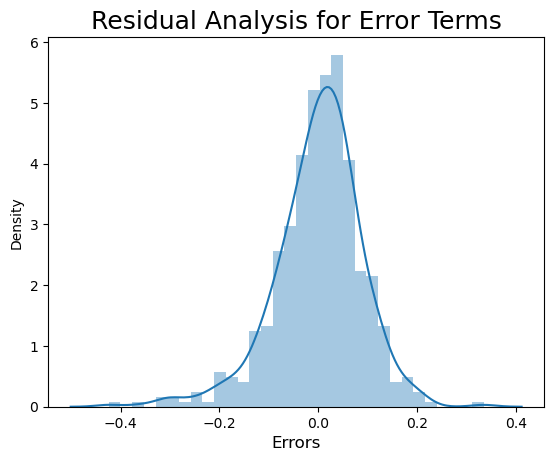

In [769]:
# Plotting the distplot of error terms to confirm the assumption of linear regression that the error terms are normally distributed

sns.distplot(y_train - y_train_pred)
plt.title('Residual Analysis for Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)

### Model Evaluation on test dataset

In [770]:
# Scaling the features of test dataset

df_test[scale_vars] = scaler.transform(df_test[scale_vars])

In [771]:
# Checking the statistical summary of test dataset

df_test.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not_Hol,weathersit_Light Snow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.036364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.640909,0.027273,0.318182
std,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.187620,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.480828,0.163248,0.466833
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [772]:
df_test.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not_Hol,weathersit_Light Snow,weathersit_Mist
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
535,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
221,0.881625,0.437098,0.339570,0.547400,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [773]:
# Assigning the cnt column of test dataset to y_test variable and other features to X_test

y_test = df_test.pop('cnt')
X_test = df_test

In [774]:
# Assigning the columns of final model to col variable
col = [ 'temp', 'yr_2019', 'season_spring', 'weathersit_Light Snow',
       'windspeed', 'mnth_Sep', 'weathersit_Mist', 'mnth_July', 'mnth_Mar',
       'mnth_Oct', 'hum', 'holiday_Yes', 'season_winter',
       'workingday_Not_Hol']

In [775]:
# Creating X_test_new dataset having the features mentioned in the col variable
X_test_new = X_test[col]

In [776]:
# Adding constant to the X_test_new variable 
X_test_new = sm.add_constant(X_test_new)


In [777]:
# Predicting the values of test dataset using model built
y_test_pred = lm.predict(X_test_new)

Text(0.5, 0, 'Errors')

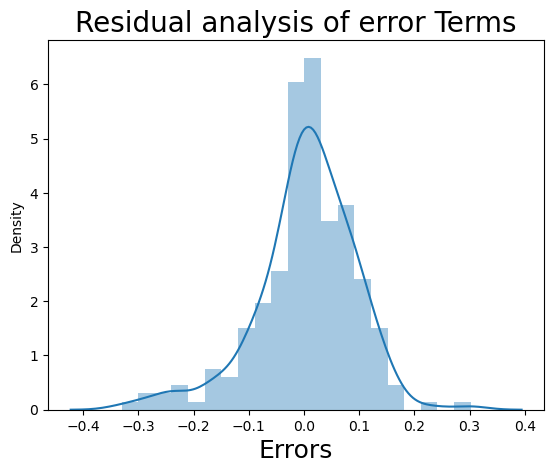

In [778]:
# Checking if the error term which is the difference between y_test and y_test_pred follows a normal distribution
sns.distplot(y_test - y_test_pred)
plt.title('Residual analysis of error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [779]:

r2_score(y_test,y_test_pred)

0.8291964536159957

 We can see that the r2 value of test dataset is quite close to that of training dataset

In [780]:
lm.params

const                    0.358203
temp                     0.464220
yr_2019                  0.230970
season_spring           -0.119063
weathersit_Light Snow   -0.252804
windspeed               -0.175375
mnth_Sep                 0.066399
weathersit_Mist         -0.057170
mnth_July               -0.074846
mnth_Mar                 0.034077
mnth_Oct                 0.036533
hum                     -0.153769
holiday_Yes             -0.105804
season_winter            0.042721
workingday_Not_Hol      -0.018224
dtype: float64

## Final  insights:

#### Equation of model:

cnt = 0.358203 + 0.464220 x temp + 0.230970 x yr_2019 - 0.119063 x season_spring -  0.252804 x weathersit_Light Snow
-0.175375 x windspeed + 0.066399 x mnth_Sep - 0.057170 x weathersit_Mist - 0.074846 x mnth_July + 0.034077 x mnth_Mar 
+0.036533 x mnth_Oct - 0.153769 x hum - 0.105804 x holiday_Yes + 0.042721 x season_winter - 0.018224 x workingday_Not_Hol

Top 3 features which influence bike booking demand are :

1.Temperature(temp) : As the temperature increases the cnt or demand for bike increases  0.46 times

2.Snowy weather(weathersit_Light Snow) : With increase in snowfall the demand(cnt) for bike decreases by 0.25 times

3.Year 2019(yr_2019) : The demand for bikes increased in the year 2019 by 0.23 times

### Building a linear model using RFE method

In [781]:
# Splitting the dataset into training and test dataset

df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)

In [782]:
df_test.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not_Hol,weathersit_Light Snow,weathersit_Mist
184,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
535,32.082500,59.2083,7.625404,6211,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
221,31.433347,42.4167,13.417286,4780,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [783]:
# Importing necessary libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [784]:
# Using RFE to find out top n features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 20)             
rfe = rfe.fit(X_train, y_train)

In [785]:
# We see that all the top features are having rfe.support_ value as True and ranking 1 and 
# non selected features are having rfe.support_ value as False

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 8),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 5),
 ('workingday_Not_Hol', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [786]:
# Creating col variable with all the columns selected in the RFE

col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_July', 'mnth_Nov', 'mnth_Sep', 'holiday_Yes', 'weekday_Sat',
       'weekday_Sun', 'weekday_Tue', 'workingday_Not_Hol',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

#### Using statmodel

In [787]:
# Creating dataset having only the required top features

X_train_rfe = X_train[col]

In [788]:
# Creating functions to build model and calculate VIF as it can be a repititive process

def model_rfe(y_train,X_train_rfe):
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm_rfe = sm.OLS(y_train,X_train_rfe).fit()
    print(lm_rfe.summary())
    return X_train_rfe

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1:

In [789]:
# Building model

X_train_new = model_rfe(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.90e-185
Time:                        23:38:00   Log-Likelihood:                 519.42
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     489   BIC:                            -907.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.38

R-squared value is  84.8% and adjusted R-squared is  84.2% . p-values for weekday_Sun is more than 0.05, feature weekday_Sun will be dropped as it is not significant.

In [790]:
# Dropping the feature weekday_Sun
X_train_new.drop('weekday_Sun',axis=1,inplace=True)

In [791]:
# Checking VIF of the different variables
checkVIF(X_train_new)

,Features,VIF
0,const,91.39
4,season_spring,5.69
1,temp,4.73
6,season_winter,3.85
5,season_summer,2.82
10,mnth_Jan,2.37
2,hum,1.94
17,workingday_Not_Hol,1.90
9,mnth_Feb,1.86
12,mnth_Nov,1.82


Even though the VIF of feature season_spring is more than 5 we will not drop immediately as we can see that there are multiple features which are insignificant(due to high p-values) as dropping these features might reduce the value of VIF for season_spring if it is correlated to these features.

### Model 2:

In [792]:

# Building model

X_train_new = model_rfe(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.80e-186
Time:                        23:38:00   Log-Likelihood:                 519.27
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     490   BIC:                            -913.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

R-squared value is  84.8% and adjusted R-squared is  84.2% . p-values for weekday_Sat is more than 0.05, feature weekday_Sat will be dropped as it is not significant.

In [793]:
# Dropping the feature weekday_Sat
X_train_new.drop('weekday_Sat',axis=1,inplace=True)

### Model 3 :

In [794]:
X_train_new = model_rfe(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.58e-187
Time:                        23:38:00   Log-Likelihood:                 519.17
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     491   BIC:                            -919.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

R-squared  and adjusted R-squared are same as the above model.But p-values for mnth_Feb is more than 0.05, feature mnth_Feb will be dropped as it is not significant.

In [795]:
# Dropping the feature mnth_Feb
X_train_new.drop('mnth_Feb',axis=1,inplace=True)

### Model 3:

In [796]:
X_train_new = model_rfe(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.29e-188
Time:                        23:38:00   Log-Likelihood:                 517.86
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     492   BIC:                            -923.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

In [797]:
checkVIF(X_train_new)

,Features,VIF
0,const,85.07
4,season_spring,5.28
1,temp,4.43
6,season_winter,3.84
5,season_summer,2.77
2,hum,1.94
11,mnth_Nov,1.77
9,mnth_Jan,1.68
17,weathersit_Mist,1.59
8,mnth_Dec,1.51


R-squared  and adjusted R-squared are same as the above model.But p-values for weekday_Tue is more than 0.05, feature weekday_Tue will be dropped as it is not significant.

In [798]:
# Dropping the feature weekday_Tue
X_train_new.drop('weekday_Tue',axis=1,inplace=True)

### Model 4:

In [799]:
X_train_new = model_rfe(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.19e-188
Time:                        23:38:00   Log-Likelihood:                 516.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     493   BIC:                            -927.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

In [800]:
checkVIF(X_train_new)

,Features,VIF
0,const,84.72
4,season_spring,5.27
1,temp,4.43
6,season_winter,3.83
5,season_summer,2.77
2,hum,1.93
11,mnth_Nov,1.77
9,mnth_Jan,1.68
16,weathersit_Mist,1.59
8,mnth_Dec,1.50


R-squared is 84.6% and adjusted R-squared is 84.1% .p-values for season_spring is more than 0.05, feature season_spring will be dropped as it is not significant.

In [801]:
# Dropping the feature season_spring
X_train_new.drop('season_spring',axis=1,inplace=True)

### Model 5:

In [802]:
X_train_new = model_rfe(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.7
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          5.84e-188
Time:                        23:38:01   Log-Likelihood:                 512.14
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     494   BIC:                            -924.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [803]:
checkVIF(X_train_new)

,Features,VIF
0,const,53.75
1,temp,2.33
5,season_winter,2.09
2,hum,1.91
10,mnth_Nov,1.71
8,mnth_Jan,1.67
15,weathersit_Mist,1.57
7,mnth_Dec,1.48
4,season_summer,1.44
9,mnth_July,1.43


R-squared is 84.4% and adjusted R-squared is 83.9% .p-values for mnth_Nov is more than 0.05, feature mnth_Nov will be dropped as it is not significant.

In [804]:
# Dropping the feature mnth_Nov
X_train_new.drop('mnth_Nov',axis=1,inplace=True)

### Model 6:

In [805]:
X_train_new = model_rfe(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     189.8
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.29e-188
Time:                        23:38:01   Log-Likelihood:                 510.97
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     495   BIC:                            -928.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [806]:
checkVIF(X_train_new)

,Features,VIF
0,const,52.86
1,temp,2.25
2,hum,1.91
8,mnth_Jan,1.63
14,weathersit_Mist,1.57
5,season_winter,1.55
4,season_summer,1.44
9,mnth_July,1.43
7,mnth_Dec,1.27
13,weathersit_Light Snow,1.25


R-squared is 84.3% and adjusted R-squared is 83.9% .p-values for mnth_Dec is more than 0.05, feature mnth_Dec will be dropped as it is not significant.

In [807]:
# Dropping the feature mnth_Dec
X_train_new.drop('mnth_Dec',axis=1,inplace=True)

### Model 7:

In [808]:
X_train_new = model_rfe(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          2.04e-189
Time:                        23:38:01   Log-Likelihood:                 510.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     496   BIC:                            -932.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [809]:
checkVIF(X_train_new)

,Features,VIF
0,const,51.46
1,temp,2.06
2,hum,1.89
13,weathersit_Mist,1.56
7,mnth_Jan,1.55
5,season_winter,1.53
8,mnth_July,1.43
4,season_summer,1.42
12,weathersit_Light Snow,1.24
3,windspeed,1.19


R-squared is 84.2% and adjusted R-squared is 83.8% .We can consider this as the final model as the p-values for all features is less than 0.05 and VIF<5 for all the features.

#### Residual Analysis

In [810]:
# Fitting the final model and finding the predicted value and assigning it to y_train_pred
lm_rfe = sm.OLS(y_train, X_train_new).fit()
y_train_pred = lm_rfe.predict(X_train_new)

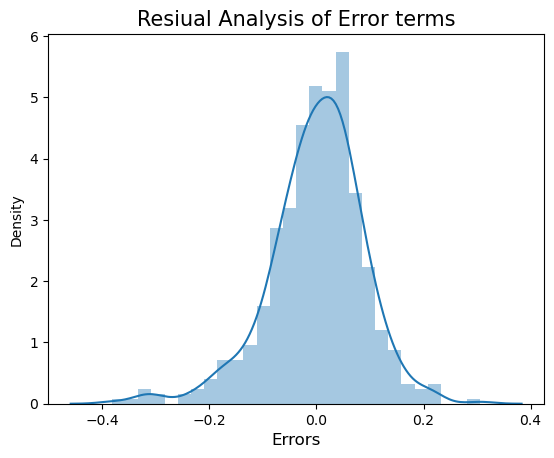

In [811]:
# Plotting the distplot of error terms or residual res to confirm the assumption of linear regression that the error terms are normally distributed

res = y_train - y_train_pred
sns.distplot(res)
plt.title('Resiual Analysis of Error terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)   
plt.show()

### Model Evaluation on test dataset

In [812]:
# Creatin variable list scale_test_vars containing the numeric features which have to be scaled
scale_test_vars = ['temp','hum','windspeed','cnt'] 

In [813]:
df_test.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not_Hol,weathersit_Light Snow,weathersit_Mist
184,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
535,32.082500,59.2083,7.625404,6211,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
221,31.433347,42.4167,13.417286,4780,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [814]:
# We just use transform to scale the test dataset as it shouldn't learn from test dataset just apply what it has learnt from 
# training set onto test dataset to predict values

df_test[scale_test_vars] = scaler.transform(df_test[scale_test_vars])

In [815]:
# Assigning the cnt column of test dataset to y_test variable and other features to X_test
y_test = df_test.pop('cnt')
X_test = df_test

In [816]:
# Assigning the columns of final model to the col variable
col = [ 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Jan', 'mnth_July', 'mnth_Sep', 'holiday_Yes',
       'workingday_Not_Hol', 'weathersit_Light Snow', 'weathersit_Mist']

In [817]:
# Assigning the test dataset corresponding to the features mentioned in col variable

X_test_new = X_test[col]


In [818]:
# Adding constant to the X_test_new dataset

X_test_new = sm.add_constant(X_test_new)

In [819]:
# Predicting the values using the final model on X_test_new dataset
y_test_pred = lm_rfe.predict(X_test_new)

In [820]:
# Importing necessary library and calculating r2_score(r-squared)
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.8043549129741355

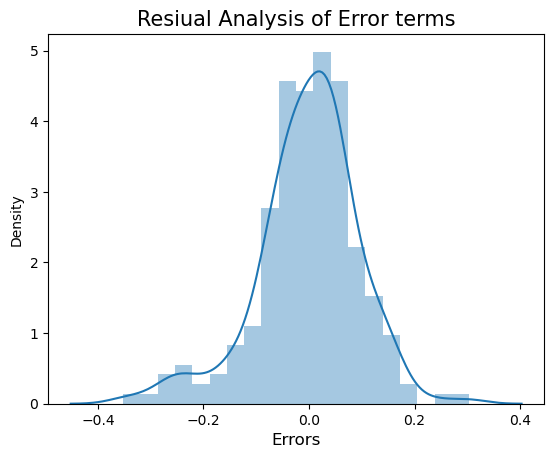

In [821]:
# Checking if the error terms of the test dataset follow normal distribution as per the assumption of linear regression
res = y_test - y_test_pred
sns.distplot(res)
plt.title('Resiual Analysis of Error terms', fontsize = 15)                  
plt.xlabel('Errors', fontsize = 12)   
plt.show()

In [822]:
lm_rfe.params

const                    0.256044
temp                     0.570135
hum                     -0.172453
windspeed               -0.193874
season_summer            0.076326
season_winter            0.125583
yr_2019                  0.228946
mnth_Jan                -0.038160
mnth_July               -0.047011
mnth_Sep                 0.093917
holiday_Yes             -0.112002
workingday_Not_Hol      -0.018671
weathersit_Light Snow   -0.237157
weathersit_Mist         -0.052711
dtype: float64

## Final insights(for RFE model)

#### Final equation:

cnt = 0.570135 x temp - 0.172453 x hum - 0.193874 x windspeed + 0.076326 x season_summer + 0.125583 x season_winter
+0.228946 x yr_2019 - 0.038160 x mnth_Jan - 0.047011 x mnth_July + 0.093917 x mnth_Sep - 0.112002 x holiday_Yes 
-0.018671 x  workingday_Not_Hol - 0.237157 x weathersit_Light Snow - 0.052711 x weathersit_Mist

Top 3 features which influence bike booking demand are :

1.Temperature(temp) : As the temperature increases the cnt or demand for bike increases  0.57 times

2.Snowy weather(weathersit_Light Snow) : With increase in snowfall the demand(cnt) for bike decreases by 0.24 times

3.Year 2019(yr_2019) : The demand for bikes increased in the year 2019 by 0.23 times